In [14]:
import cv2
import numpy as np
import os
from skimage.morphology import convex_hull_image
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from PIL import Image

pic_target = "result"
target_dir = os.listdir("img/")
if pic_target not in target_dir:
    os.mkdir("img/{}/" .format(pic_target))
else:
    pass

cut_width = 28
cut_length = 28

picture = cv2.imread("img/versuch2_0_2198.png", 0)
(width, length) = picture.shape

pic = np.zeros((cut_width, cut_length))

num_width = int(width / cut_width)
num_length = int(length / cut_length)

for i in range(0, num_width):
    for j in range(0, num_length):
        pic = picture[i*cut_width : (i+1)*cut_width, j*cut_length : (j+1)*cut_length]
        pic = pic.astype(np.bool8)
        chull = convex_hull_image(pic)
        #chull_diff = img_as_float(chull.copy())
        result_path = pic_target + "{}_{}.png".format(i+1, j+1)
        chull = chull.astype(np.uint8)
        j = Image.fromarray(chull*255)
        j.save(result_path)

print("done!!")

done!!


/tmp/ipykernel_13084/3464340795.py:30: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  pic = pic.astype(np.bool8)
/tmp/ipykernel_13084/3464340795.py:31: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  chull = convex_hull_image(pic)


In [15]:
import os
pic_path = "img/result/"
pic_target = "picture"


if pic_target not in target_dir:
    os.mkdir("img/{}/" .format(pic_target))
else:
    pass

num_width_list = []
num_length_list = []

picture_names = os.listdir(pic_path)

img_1_1 = cv2.imread(pic_path + "1_1.png", 0)
(width, length) = img_1_1.shape

for picture_name in picture_names:
    num_width_list.append(int(picture_name.split("_")[0]))
    num_length_list.append(int(picture_name.split("_")[0]))

num_width = max(num_width_list)
num_length = max(num_length_list)

splicing_pic = np.zeros((num_width*width, num_length*length))

for i in range(1, num_width+1):
    for j in range(1, num_length+1):
        img_part = cv2.imread(pic_path + "{}_{}.png".format(i, j), 0)
        splicing_pic[width*(i-1) : width*i, length*(j-1) : length*j] = img_part

cv2.imwrite(pic_target + "result.png", splicing_pic)
print("done!")

['versuch2_0_2198.png', 'chull_difference.png', 'example_scene_segmented.png', 'figure1.png', 'geom_oriented_bbox_problem1.png', 'chull_difference_plot.png', 'chull_difference_plot_crop.png', 'logo-left-old.png', 'contours.png', 'geom_horiz_aligned_bbox.png', 'column_type_classification.png', 'sample_raw_image.jpg', 'logo-left.png', 'sample_annotated_image.png', 'scan2bim_overview.png', 'UNET-Grafik.png', 'result', 'motivation.png', 'picture', 'sample_class_visualization.jpg', 'convexhull_8_8.png', 'scaleBIM_framework.png', 'geom_oriented_bbox_problem.png', 'synthetic_data_workflow.png', 'population_gdp_cement_production.xlsx', 'reconstructedBIM.png', 'EC3_LOGO_2.png', 'logo-left-short.png']
done!


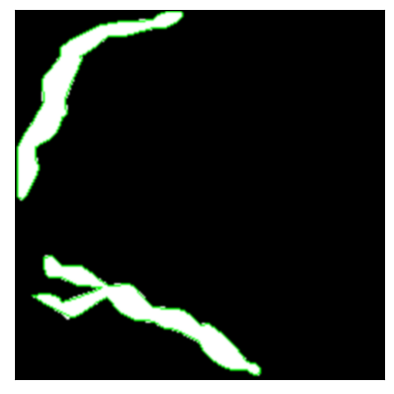

2
[83, 62]


In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# find coutours with CHAIN_APPROX_TC89_L1

img = cv2.imread("img/convexhull_8_8.png")

imggray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(imggray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS) #CHAIN_APPROX_TC89_L1, CHAIN_APPROX_SIMPLE
mask = cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
plt.imshow(mask, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
#cv2.namedWindow("drawContours", 0)
#cv2.imshow("drawContours", mask)
#cv2.waitKey()

print(len(contours))
print([len(a) for a in contours])

## Contour coordinates

In [27]:
# calculate area and perimeter of coutours
i = 1
for cont in contours:

    area = cv2.contourArea(cont)
    perimeter = cv2.arcLength(cont, True)

    contour_coords = np.squeeze(cont)
    contour_coords = contour_coords * 2.7 # scale pixel to mm
    print(np.shape(contour_coords)) # ?? in clockwise order ??

    txt_out_file = "img/txt_out_file{}.csv".format(i)
    np.savetxt(txt_out_file, contour_coords)
    i += 1

(83, 2)
(62, 2)
